In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
date='Jan 1 1970'

In [3]:
pd.to_datetime(date)

Timestamp('1970-01-01 00:00:00')

In [4]:
url = "https://gist.githubusercontent.com/ryanorsinger/b309f8db19e0ca71b213d4877d835e77/raw/f5841017310e2f4ca070b313529ceec2375336ba/coffee_consumption.csv"
df = pd.read_csv(url)
print(df.dtypes)
df.head()


date                   object
coffee_consumption    float64
dtype: object


,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


In [5]:
# convert our date column to datetime type
df.date = pd.to_datetime(df.date)
df.dtypes


date                  datetime64[ns]
coffee_consumption           float64
dtype: object

In [6]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['weekday'] = df.date.dt.day_name()
df.head()


,date,coffee_consumption,year,month,day,weekday
0,2019-01-01,14.301915,2019,1,1,Tuesday
1,2019-01-02,12.905900,2019,1,2,Wednesday
2,2019-01-03,10.046015,2019,1,3,Thursday
3,2019-01-04,6.354805,2019,1,4,Friday
4,2019-01-07,8.545563,2019,1,7,Monday


In [7]:
df = df.set_index('date').sort_index()
df


,coffee_consumption,year,month,day,weekday
date,,,,,
2019-01-01,14.301915,2019,1,1,Tuesday
2019-01-02,12.905900,2019,1,2,Wednesday
2019-01-03,10.046015,2019,1,3,Thursday
2019-01-04,6.354805,2019,1,4,Friday
2019-01-07,8.545563,2019,1,7,Monday
...,...,...,...,...,...
2019-12-25,12.250875,2019,12,25,Wednesday
2019-12-26,7.513206,2019,12,26,Thursday
2019-12-27,9.464345,2019,12,27,Friday


* You should sort the dataframe by the datetime field before doing any date-related manipulations, otherwise they could have undefined behavior.

In [8]:
df.index.min(), df.index.max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2019-12-31 00:00:00'))

In [9]:
df.index.year


Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='date', length=261)

In [10]:
df['2019-05']


/var/folders/nl/h7bb3qxn0s5dcp9j1thjq_4h0000gn/T/ipykernel_83668/1697311352.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2019-05']


,coffee_consumption,year,month,day,weekday
date,,,,,
2019-05-01,9.970773,2019,5,1,Wednesday
2019-05-02,8.755956,2019,5,2,Thursday
2019-05-03,7.790948,2019,5,3,Friday
2019-05-06,13.196664,2019,5,6,Monday
2019-05-07,11.725856,2019,5,7,Tuesday
2019-05-08,8.495455,2019,5,8,Wednesday
2019-05-09,11.407965,2019,5,9,Thursday
2019-05-10,11.344190,2019,5,10,Friday
2019-05-13,9.517543,2019,5,13,Monday


In [11]:
df['2019-05-06':'2019-05-16'] # NB. inclusive

,coffee_consumption,year,month,day,weekday
date,,,,,
2019-05-06,13.196664,2019,5,6,Monday
2019-05-07,11.725856,2019,5,7,Tuesday
2019-05-08,8.495455,2019,5,8,Wednesday
2019-05-09,11.407965,2019,5,9,Thursday
2019-05-10,11.344190,2019,5,10,Friday
2019-05-13,9.517543,2019,5,13,Monday
2019-05-14,6.220478,2019,5,14,Tuesday
2019-05-15,12.743796,2019,5,15,Wednesday
2019-05-16,9.169615,2019,5,16,Thursday


In [12]:
by_day = df.asfreq('D')
by_day


,coffee_consumption,year,month,day,weekday
date,,,,,
2019-01-01,14.301915,2019.0,1.0,1.0,Tuesday
2019-01-02,12.905900,2019.0,1.0,2.0,Wednesday
2019-01-03,10.046015,2019.0,1.0,3.0,Thursday
2019-01-04,6.354805,2019.0,1.0,4.0,Friday
2019-01-05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2019-12-27,9.464345,2019.0,12.0,27.0,Friday
2019-12-28,NaN,NaN,NaN,NaN,NaN
2019-12-29,NaN,NaN,NaN,NaN,NaN


# Exercise 1

In [13]:
from vega_datasets import data
data.sf_temps()


,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [14]:
df = data.sf_temps()

In [15]:
df = df.set_index('date').sort_index()
df

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


1. Resample by the day and take the average temperature. Visualize the average temperature over time.

<AxesSubplot:xlabel='date'>

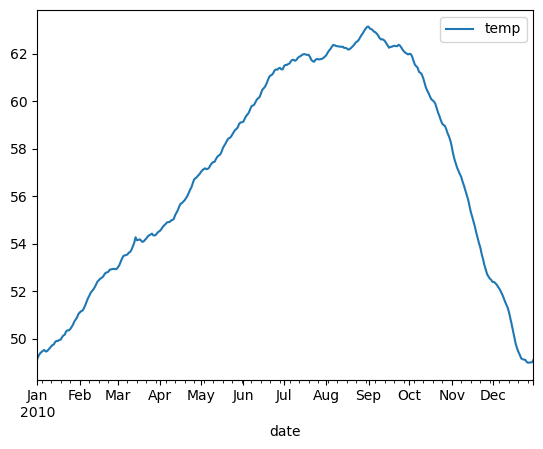

In [16]:
df.resample('D').mean().plot()


2. Write the code necessary to visualize the minimum temperature over time.


<AxesSubplot:xlabel='date'>

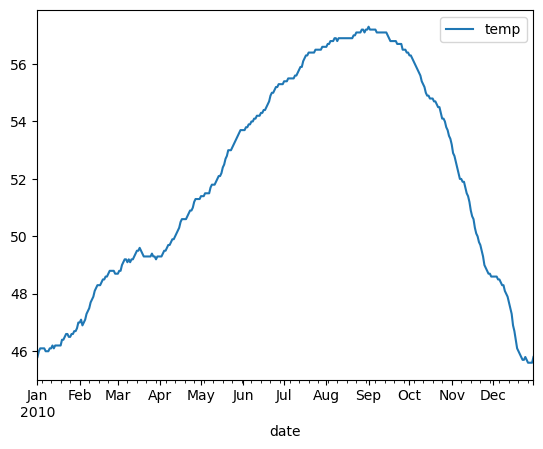

In [17]:
df.resample('D').min().plot()


3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

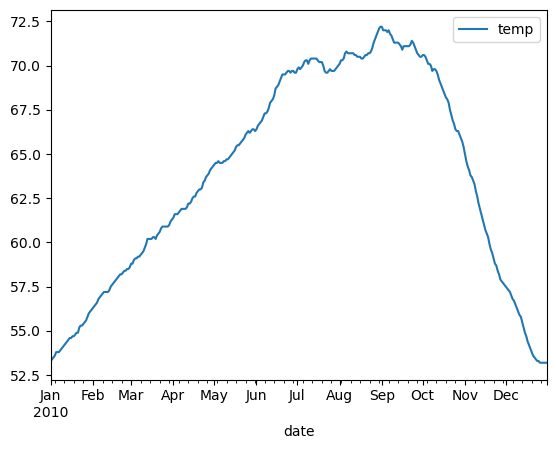

In [18]:
df.resample('D').max().plot()


4. Which month is the coldest, on average?
* January

In [19]:
round(df.resample('M').mean().sort_values(by='temp'),2)

,temp
date,
2010-01-31,49.98
2010-12-31,50.50
2010-02-28,52.24
2010-03-31,53.96
2010-11-30,55.19
2010-04-30,55.63
2010-05-31,57.97
2010-10-31,60.25
2010-06-30,60.44


5. Which month has the highest average temperature?
* September 

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

* August

In [20]:
df.resample('D').min()

,temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1
...,...
2010-12-27,45.6
2010-12-28,45.6
2010-12-29,45.6


In [21]:
df.resample('D').max()

,temp
date,
2010-01-01,53.3
2010-01-02,53.4
2010-01-03,53.5
2010-01-04,53.6
2010-01-05,53.8
...,...
2010-12-27,53.2
2010-12-28,53.2
2010-12-29,53.2


In [22]:
df.resample('D').max() - df.resample('D').min()

,temp
date,
2010-01-01,7.5
2010-01-02,7.4
2010-01-03,7.4
2010-01-04,7.5
2010-01-05,7.7
...,...
2010-12-27,7.6
2010-12-28,7.6
2010-12-29,7.6


In [23]:
df['temp_change']=df.resample('D').max() - df.resample('D').min()

In [24]:
df.resample('M').max().sort_values(by='temp_change')

,temp,temp_change
date,,
2010-12-31,57.5,8.9
2010-01-31,56.2,9.3
2010-02-28,58.6,9.9
2010-11-30,65.0,11.8
2010-03-31,61.3,12.0
2010-04-30,64.3,13.0
2010-05-31,66.4,13.1
2010-10-31,70.6,14.4
2010-06-30,69.7,14.8


In [25]:
df.resample('M').min().sort_values(by='temp_change')

,temp,temp_change
date,,
2010-01-31,45.8,7.4
2010-12-31,45.6,7.4
2010-11-30,48.6,9.0
2010-02-28,46.9,9.1
2010-03-31,48.7,10.0
2010-04-30,49.3,12.0
2010-10-31,53.4,12.0
2010-05-31,51.4,12.6
2010-06-30,53.7,12.7


7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [26]:
df=df.drop(columns='temp_change')

In [27]:
df.resample('D').min()


,temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1
...,...
2010-12-27,45.6
2010-12-28,45.6
2010-12-29,45.6


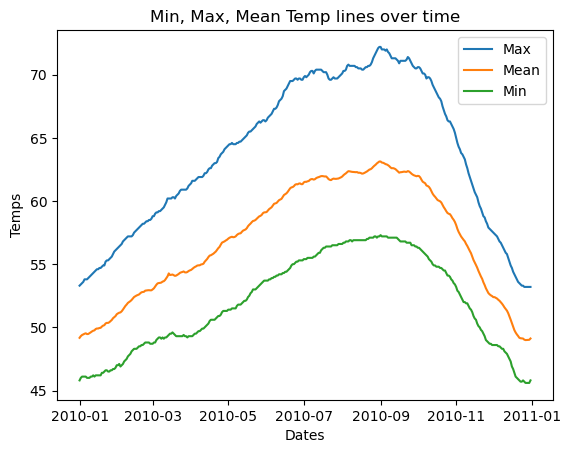

In [28]:
import matplotlib.pyplot as plt
# line 1 points
x1 = df.resample('D').min()
y1 = df.resample('D').max()
x2 = df.resample('D').mean()
# plotting the line 1 points 
plt.plot(y1, label= 'Max')
# plotting the line 2 points 
plt.plot(x2, label = "Mean")
# plotting the line 3 points
plt.plot(x1, label = "Min")
plt.xlabel('Dates')
# Set the y axis label of the current axis.
plt.ylabel('Temps')
# Set a title of the current axes.
plt.title('Min, Max, Mean Temp lines over time')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()


# Exercise Set 2

In [29]:
df = data.seattle_weather()


In [30]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [31]:
df = df.set_index('date').sort_index()
df

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


1. Which year and month combination has the highest amount of precipitation?
2015-03

In [32]:
df.resample('M').precipitation.max()

date
2012-01-31    27.7
2012-02-29    17.3
2012-03-31    27.4
2012-04-30    10.9
2012-05-31    18.5
2012-06-30    16.5
2012-07-31    15.2
2012-08-31     0.0
2012-09-30     0.3
2012-10-31    34.5
2012-11-30    54.1
2012-12-31    22.6
2013-01-31    38.4
2013-02-28     9.4
2013-03-31    11.9
2013-04-30    39.1
2013-05-31    13.7
2013-06-30     9.9
2013-07-31     0.0
2013-08-31    19.3
2013-09-30    43.4
2013-10-31     9.1
2013-11-30    30.0
2013-12-31    10.7
2014-01-31    21.6
2014-02-28    26.4
2014-03-31    46.7
2014-04-30    18.5
2014-05-31    33.3
2014-06-30     6.4
2014-07-31    19.3
2014-08-31    21.6
2014-09-30    20.3
2014-10-31    32.0
2014-11-30    34.3
2014-12-31    20.6
2015-01-31    26.2
2015-02-28    26.2
2015-03-31    55.9
2015-04-30    14.0
2015-05-31     6.1
2015-06-30     4.6
2015-07-31     2.0
2015-08-31    32.5
2015-09-30     5.8
2015-10-31    33.0
2015-11-30    47.2
2015-12-31    54.1
Freq: M, Name: precipitation, dtype: float64

2. Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

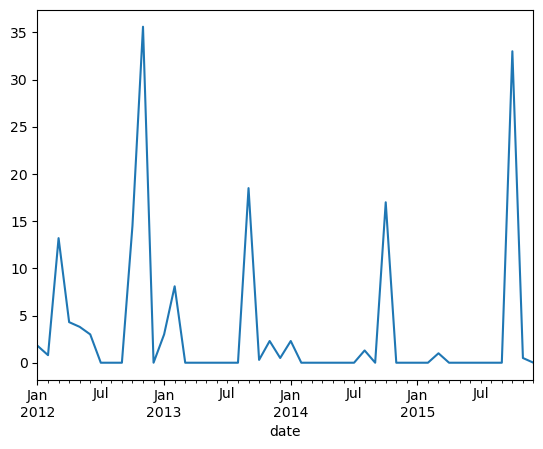

In [33]:
df['precipitation'].asfreq('M').plot()

3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

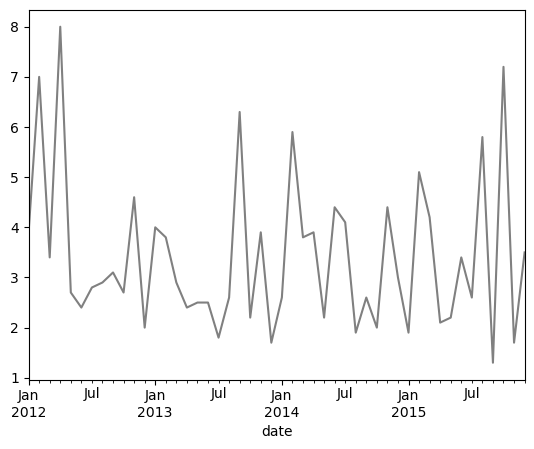

In [34]:
df['wind'].asfreq('M').plot(c='grey')

4. Which year-month combination is the windiest?
* 2012-12

In [35]:
df['wind'].sort_values()

date
2013-10-23    0.4
2013-12-26    0.5
2015-01-10    0.5
2013-11-25    0.5
2013-10-24    0.6
             ... 
2013-02-22    8.1
2012-01-21    8.2
2014-01-11    8.8
2013-12-01    8.8
2012-12-17    9.5
Name: wind, Length: 1461, dtype: float64

5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
* 2014

In [36]:
df[df['weather']=='sun'].index.year.value_counts()

2014    211
2013    205
2015    180
2012    118
Name: date, dtype: int64

6. In which month does it rain the most?
* February

In [37]:
df[df['weather']=='rain'].index.month.value_counts()

2     40
3     37
1     35
11    25
12    23
4     20
10    20
6     19
5     16
7     14
8      6
9      4
Name: date, dtype: int64

7. Which month has the most number of days with a non-zero amount of precipitation?
* December

In [38]:
df[df['precipitation']!= 0.0].index.month.value_counts()

12    81
2     73
3     73
11    71
1     66
10    61
4     59
6     37
9     35
5     34
8     22
7     11
Name: date, dtype: int64

# Exercise Set 3

In [39]:
df = data.flights_20k()

Does the day of the week make a difference in the delay amount?
Does the month make a difference in the delay amount?


1. Convert any negative delays to 0.

In [41]:
df = df.set_index('date').sort_index()
df

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU
...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU
2001-03-31 21:05:00,-5,318,FLL,JAX
2001-03-31 21:05:00,-1,451,MCI,IND


In [42]:
df.delay = df.delay.mask(df.delay.lt(0),0)

In [43]:
df

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU
...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU
2001-03-31 21:05:00,0,318,FLL,JAX
2001-03-31 21:05:00,0,451,MCI,IND


2. Which hour of the day has the highest average delay?
* 5pm/1700

In [44]:
df.delay.index.hour.value_counts()

17    1428
7     1418
8     1345
14    1306
12    1297
18    1266
16    1236
11    1231
15    1221
19    1220
9     1198
13    1178
10    1154
20    1125
6      972
21     919
22     369
23      65
5       37
0       12
3        2
1        1
Name: date, dtype: int64

3. Does the day of the week make a difference in the delay amount?


In [45]:
df['weekday'] = df.index.day_name()

In [47]:
df.groupby('weekday').delay.mean()

weekday
Friday       17.757596
Monday        7.165772
Saturday      8.431498
Sunday       10.413542
Thursday     12.821322
Tuesday       9.410866
Wednesday    11.032478
Name: delay, dtype: float64

In [53]:
df['month']= df.index.month

In [55]:
df.groupby('month').delay.mean()

month
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64